## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset


*   Reference for [Topic modeling ](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.

 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

The important libraries used to perform the Topic Modeling are: Pandas, Gensim, pyLDAvis

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

## Data Understanding
### Loading necessary packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data loader class
class DataLoader:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name
    
 
  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df
  
    

In [ ]:
#object creation
DataLoader_obj= DataLoader('drive/MyDrive/data','cleaned_fintech_data.csv')


In [ ]:
tweets_df=DataLoader_obj.read_csv()
tweets_df.dropna()


,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp


In [ ]:
len(tweets_df)

5621

In [ ]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [ ]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return word_list, word_to_id, corpus_1


In [ ]:
PrepareData_obj=PrepareData(tweets_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [ ]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(29, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 2), (57, 1)], [(58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(29, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1),

In [ ]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [ ]:
print(id_words)

[[('babies', 1), ('baby', 1), ('becoming', 1), ('birth', 1), ('bundles', 1), ('burden', 1), ('coz', 1), ('douglas', 1), ('expensiveturn', 1), ('formula', 1), ('forth', 1), ('gave', 1), ('giving', 2), ('handmpesa', 1), ('hard', 1), ('joy', 1), ('kenya', 1), ('life', 1), ('meeting', 1), ('mother', 1), ('needs', 1), ('nutritional', 1), ('nyaoko', 1), ('tears', 1), ('this', 1), ('time', 1)], [('all', 1), ('away', 1), ('brings', 1), ('carbon', 1), ('combat', 1), ('critical', 1), ('day', 1), ('degraded', 1), ('food', 1), ('helps', 1), ('jobs', 1), ('land', 1), ('lifting', 1), ('locking', 1), ('many', 1), ('poverty', 1), ('recover', 1), ('restoring', 1), ('security', 1), ('slows', 1), ('today', 1), ('world', 1)], [('carbon', 1), ('confident', 1), ('delivered', 1), ('emissions', 1), ('g7', 1), ('hearing', 2), ('like', 1), ('reducing', 1), ('s', 2), ('say', 2), ('vaccines', 1)], [('account', 1), ('across', 1), ('airtime', 1), ('arteta', 1), ('buy', 1), ('even', 1), ('fuliza', 1), ('kabando', 1)

### Topic Modeling using Latent Dirichlet Allocation 
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics 
which covers a good deal of the words in the tweet



In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.034*"carbon" + 0.023*"climate" + 0.021*"gt" + 0.013*"bp" + 0.011*"change" '
  '+ 0.008*"land" + 0.008*"latest" + 0.008*"large" + 0.007*"intense" + '
  '0.007*"americans"'),
 (1,
  '0.023*"carbon" + 0.012*"first" + 0.012*"money" + 0.011*"emissions" + '
  '0.011*"the" + 0.010*"reduce" + 0.009*"see" + 0.009*"s" + 0.009*"it" + '
  '0.009*"this"'),
 (2,
  '0.018*"nt" + 0.016*"meat" + 0.015*"carbon" + 0.014*"uk" + 0.013*"like" + '
  '0.013*"money" + 0.012*"giving" + 0.012*"june" + 0.012*"rt" + 0.012*"th"'),
 (3,
  '0.043*"carbon" + 0.029*"tax" + 0.028*"protecting" + 0.028*"rights" + '
  '0.024*"amp" + 0.023*"oil" + 0.018*"emissions" + 0.017*"new" + 0.015*"covid" '
  '+ 0.015*"coal"'),
 (4,
  '0.029*"government" + 0.026*"i" + 0.023*"carbon" + 0.021*"zero" + 0.020*"s" '
  '+ 0.018*"emissions" + 0.016*"net" + 0.015*"gas" + 0.015*"cost" + '
  '0.014*"target"')]


In [ ]:


pprint(lda_model.show_topics(formatted=False))

[(0,
  [('carbon', 0.033523474),
   ('climate', 0.022791425),
   ('gt', 0.021368595),
   ('bp', 0.012794656),
   ('change', 0.01143688),
   ('land', 0.008486307),
   ('latest', 0.007863012),
   ('large', 0.0076355455),
   ('intense', 0.0074943104),
   ('americans', 0.006986857)]),
 (1,
  [('carbon', 0.022609165),
   ('first', 0.011645413),
   ('money', 0.01162081),
   ('emissions', 0.011445911),
   ('the', 0.010748187),
   ('reduce', 0.0100996215),
   ('see', 0.009358184),
   ('s', 0.009275624),
   ('it', 0.008924053),
   ('this', 0.008717043)]),
 (2,
  [('nt', 0.018154405),
   ('meat', 0.015851557),
   ('carbon', 0.015013237),
   ('uk', 0.014227561),
   ('like', 0.012811348),
   ('money', 0.012667962),
   ('giving', 0.012188516),
   ('june', 0.012113796),
   ('rt', 0.011740563),
   ('th', 0.01171801)]),
 (3,
  [('carbon', 0.042917076),
   ('tax', 0.028562853),
   ('protecting', 0.027864862),
   ('rights', 0.027779127),
   ('amp', 0.023900261),
   ('oil', 0.023304556),
   ('emissions',

Each line is a topic with individual topic terms and weights. Topic0  can be termed as climate change, and Topic4 can be termed as government and carbon emission.

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [ ]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -6.740281296031329

 Ldamodel Coherence Score/Accuracy on Tweets:  0.5846626375222727


Basic Ldamodel Coherence Score 0.58 This means that the model has performed reasonably well in topic modeling.

In [ ]:
!pip install pyLDAvis 

     |████████████████████████████████| 1.7MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7MB 183kB/s 
     |████████████████████████████████| 9.9MB 29.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=80ed5590b4b261da07b87fe1835cd4a0d9e598d80ab0c470c79f8aedc6fb68d5
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

**Anlayizing results**
Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.298347  0.187598       1        1  27.315574
1     -0.011718  0.019788       2        1  22.293761
2      0.303998  0.197470       3        1  20.110988
4     -0.029315 -0.162216       4        1  17.137186
0      0.035381 -0.242640       5        1  13.142490, topic_info=            Term        Freq       Total Category  logprob  loglift
973          tax  617.000000  617.000000  Default  30.0000  30.0000
966   protecting  602.000000  602.000000  Default  29.0000  29.0000
971       rights  600.000000  600.000000  Default  28.0000  28.0000
364   government  397.000000  397.000000  Default  27.0000  27.0000
208          oil  504.000000  504.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1752       large   79.340788  123.059359   Topic5  -4.8749   1.5904
37          land   88.181035  394.623878   Topic5  -4.7693   0.5308
558       future   72.592915  115.870899   Topic5  -4.9638   1.5617
114         kuda   71.132622  200.909601   Topic5  -4.9841   0.9910
253    footprint   71.458386  317.045182   Topic5  -4.9796   0.5394

[244 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
468       2  0.991148  absolutely
58        1  0.124406     account
58        2  0.163283     account
58        3  0.711449     account
1186      3  0.995155        accs
...     ...       ...         ...
300       3  0.912999       would
1208      3  0.995155        xtra
277       2  0.849107        year
277       3  0.144348        year
373       4  0.996612        zero

[265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 1])

In [ ]:
# Tranining on different values of topics/k

# for k in range(2,25): # Train LDA on different values of k
#     print('Round: '+str(k))
#     LDA = gensim.models.ldamulticore.LdaMulticore
#     ldamodel = LDA(doc_term_matrix, num_topics=k, id2word = dictionary, passes=20, iterations=100,
#                    chunksize = 10000, eval_every = 10, random_state=20)
    
#     ldamodel.save(f"ldamodel_for_{k}topics_Run_10")
#     pprint(ldamodel.print_topics())

In [ ]:
# Coherence score
# coherence = []
# for k in range(2,25):
#     LDA = gensim.models.ldamulticore.LdaMulticore
#     ldamodel = LDA.load(f"ldamodel_for_{k}topics_Run_10")
#     cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=Complete_Content, dictionary=dictionary, coherence='c_v')
#     coherence.append((k, 'default', 'default', cm.get_coherence()))

# Sentiment Analysis

[Notebook reference](https://github.com/lazuxd/simple-imdb-sentiment-analysis/blob/master/sentiment-analysis.ipynb)

## Building a Sentiment Classifier using Scikit-Learn

<center><img src="https://raw.githubusercontent.com/lazuxd/simple-imdb-sentiment-analysis/master/smiley.jpg"/></center>
<center><i>Image by AbsolutVision @ <a href="https://pixabay.com/ro/photos/smiley-emoticon-furie-sup%C4%83rat-2979107/">pixabay.com</a></i></center>

> &nbsp;&nbsp;&nbsp;&nbsp;**Sentiment analysis**, an important area in Natural Language Processing, is the process of automatically detecting affective states of text. Sentiment analysis is widely applied to voice-of-customer materials such as product reviews in online shopping websites like Amazon, movie reviews or social media. It can be just a basic task of classifying the polarity of a text as being positive/negative or it can go beyond polarity, looking at emotional states such as "happy", "angry", etc.

&nbsp;&nbsp;&nbsp;&nbsp;Here we will build a classifier of [tweets](https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv) about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.



>> ### Import required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read the Data
DataLoader_obj= DataLoader('/content/drive/MyDrive/data','airlines.csv')

In [ ]:
airline_tweets_df=DataLoader_obj.read_csv()

In [ ]:
airline_tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


>> ### Basic EDA

In [ ]:
# plot params
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


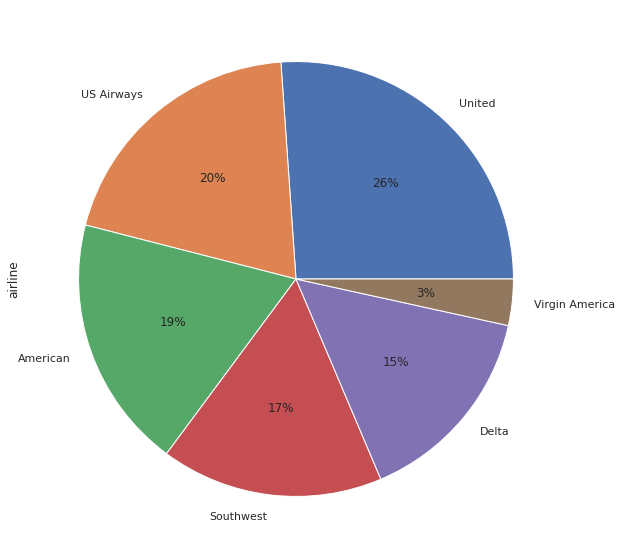

In [ ]:
# number of tweets for each airline
sns.set(rc={'figure.figsize':(14,10)})
airline_tweets_df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

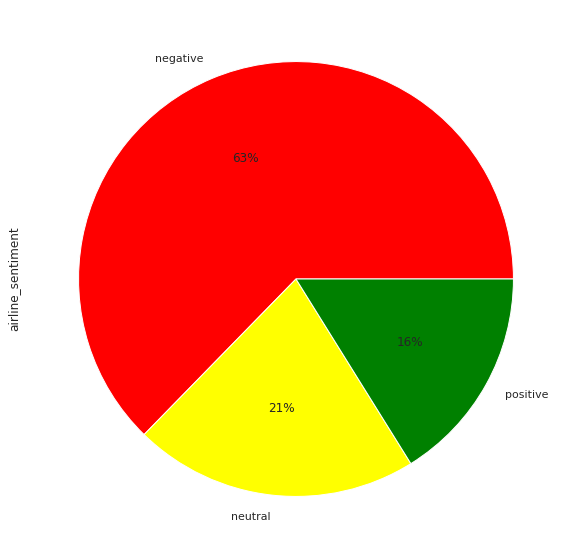

In [ ]:
# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
airline_tweets_df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

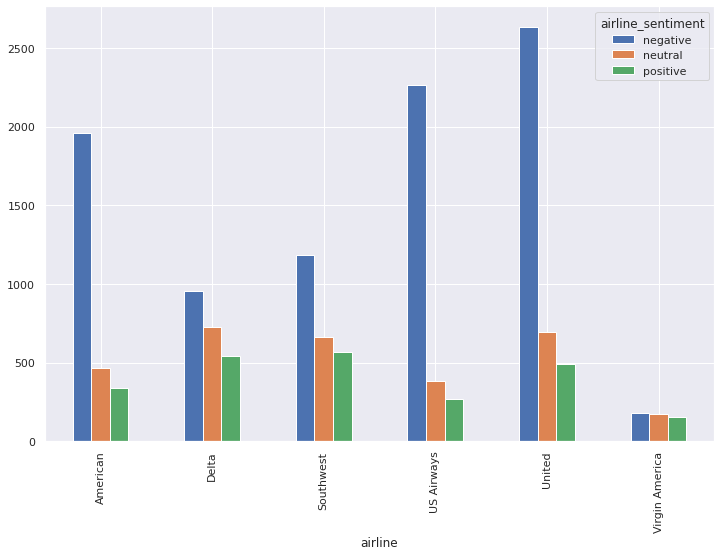

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
airline_sentiment = airline_tweets_df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

>> ### Data Cleaning

In [ ]:
airline_tweets_df.columns

In [ ]:
# Selecting the feature and the label
features = airline_tweets_df.iloc[:, 10].values
labels = airline_tweets_df.iloc[:, 1].values

In [ ]:
# Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

>> ### Representing Text in Numeric Form

Statistical algorithms use mathematics to train machine learning models. However, mathematics only work with numbers. To make statistical algorithms work with text, we first have to convert text to numbers. We will be using TF-IDF(Term frequency and Inverse Document frequency.)

TF-IDF gives weight for each unique word set. In TF-IDF,  words that occur less in all the documents and more in individual document contribute more towards classification.
 

$$\begin{align}\frac{\text{term frequency}}{\text{document frequency}} &= \text{term frequency} \cdot \frac{1}{\text{document frequency}} \\ &= \text{term frequency} \cdot \text{inverse document frequency} \\ &= \text{tf} \cdot \text{idf}\end{align}$$  
  
&nbsp;&nbsp;&nbsp;&nbsp;Now, there are more ways used to describe both term frequency and inverse document frequency. But the most common way is by putting them on a logarithmic scale:  
  
$$tf(t, d) = log(1+f_{t,d})$$  
$$idf(t) = log(\frac{1+N}{1+n_t})$$  
  
&nbsp;&nbsp;&nbsp;&nbsp;where:  
$$\begin{align}f_{t,d} &= \text{count of term } \textbf{t} \text{ in document } \textbf{d} \\  
N &= \text{total number of documents} \\  
n_t &= \text{number of documents that contain term } \textbf{t}\end{align}$$  
  
<b>We added 1 in the first logarithm to avoid getting $-\infty$ when $f_{t,d}$ is 0. In the second logarithm we added one fake document to avoid division by zero.</b>

There is Python's Scikit-Learn library contains the TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors. The following script performs this

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

>> ### Train/test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

>> ### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

>> ### Prediction

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
predictions[:10]

array(['negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

>> ### Evaluation


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.7599043715846995


## References

<sup>(1)</sup> &nbsp;[Sentiment Analysis - Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis)  
<sup>(1)</sup> &nbsp;[Sentiment Analysis - Airline tweet sentiment analysis with sckit-learn](https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/)  
<sup>(2)</sup> &nbsp;[Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)  
<sup>(3)</sup> &nbsp;[Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)  
<sup>(4)</sup> &nbsp;[Tf-idf - Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)  
<sup>(5)</sup> &nbsp;[TfidfTransformer - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)  
<sup>(6)</sup> &nbsp;[Stop words - Wikipedia](https://en.wikipedia.org/wiki/Stop_words)  
<sup>(7)</sup> &nbsp;[A list of English stopwords](https://gist.github.com/sebleier/554280)  
<sup>(8)</sup> &nbsp;[CountVectorizer - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
<sup>(9)</sup> &nbsp;[Scipy sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html)  
<sup>(10)</sup> [Compressed Sparse Row matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix)  
<sup>(11)</sup> [SGDClassifier - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  
<sup>(12)</sup> [RandomizedSearchCV - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
<sup>(13)</sup> [Sentiment Classification using Document Embeddings trained with
Cosine Similarity](https://www.aclweb.org/anthology/P19-2057.pdf)  